# Simulating Nazanin's Pulse from ND HNLF

In [18]:
import sys
sys.path.append('C:\\Users\\pchan\\Documents\\GitHub\\FourWaveMixing-and-Intrapulse-DFG-using-PyNLO')
import numpy as np
import matplotlib.pyplot as plt
import Fiber_PPLN_NLSE as fpn
import clipboard_and_style_sheet


clipboard_and_style_sheet.style_sheet()


def normalize(vec):
    return vec / np.max(abs(vec))


path = 'C:/Users/pchan/Documents/Research Projects/PyNLO_project_for_new_system_design/Nazanin_FROG_pulse' \
       '/Recunstructed FROG_ 21fs pulse/'

data_temp = np.genfromtxt(path + 'ReconstructedPulseTemporal.txt')
data_spec = np.genfromtxt(path + 'ReconstructedPulseSpectrum.txt')
center_wavelength_nm = data_spec[:, 2][len(data_spec) // 2] * 1e3
pulse = fpn.Pulse(center_wavelength_nm=center_wavelength_nm, EPP_nJ=1.4)


# don't forget to negate the phase
def get_data(string):
    if string == 'temp':
        # data_temp = np.genfromtxt(path + 'ReconstructedPulseTemporal.txt')
        amp = data_temp[:, 0]
        phase = - data_temp[:, 1]
        T_ps = data_temp[:, 2] / 1000
        AT = amp * np.exp(1j * phase)
        pulse.set_AT_experiment(T_ps, AT)
    elif string == 'spec':
        # data_spec = np.genfromtxt(path + 'ReconstructedPulseSpectrum.txt')
        lamda = data_spec[:, 2]
        phase = - data_spec[:, 1]
        amp = data_spec[:, 0]
        AW = amp * np.exp(1j * phase)
        pulse.set_AW_experiment(lamda, AW)
    else:
        raise ValueError('string should be either temp or spec')
    return pulse


class Evol:
    def __init__(self, evol):
        self.pulse = evol.pulse
        self.AW2d = evol.AW
        self.zs = evol.zs * 1e3

        toplot = abs(self.AW2d) ** 2
        toplot = (toplot.T / np.max(toplot, axis=1)).T
        self.toplot = toplot

    def plot_2dwindow(self, ll_um, ul_um, ax=None):
        cond = np.logical_and(self.pulse.wl_um >= ll_um, self.pulse.wl_um <= ul_um)
        ind = np.where(cond)
        if ax is None:
            fig, ax = plt.subplots(1, 1)
        ax.pcolormesh(self.pulse.wl_um[ind], self.zs, self.toplot.T[ind].T, shading='auto', cmap='jet')
        ax.set_xlabel('wavelength ($\mathrm{\mu m}$)')
        ax.set_ylabel("z (mm)")

    def plot_1dwindow(self, ax=None):
        ind = np.where(self.pulse.wl_um >= 0)
        if ax is None:
            fig, ax = plt.subplots(1, 1)
        ax.semilogy(self.pulse.wl_um[ind], normalize(abs(self.pulse.AW[ind]) ** 2))
        ax.set_xlim(1, 6)
        ax.set_ylim(1e-6, 1)
        ax.set_xlabel('wavelength ($\mathrm{\mu m}$)')
        ax.set_ylabel("a.u.")

    def plot_power_in_window(self, ll_um, ul_um, ax=None):
        power = fpn.power_in_window(self.pulse, self.AW2d, ll_um, ul_um, frep_MHz=1e3) * 1e3
        if ax is None:
            fig, ax = plt.subplots(1, 1)
        ax.plot(self.zs, power, '.')
        ax.set_xlabel("z (mm)")
        ax.set_ylabel("mW")
        return power


def constant_poling_period(period):
    return np.repeat(period, 5000)


def appln_poling_period(ll_um, ul_um):
    return np.linspace(ll_um, ul_um, 5000)


Here I'm making sure that I set the pulse field correctly. 

(-2.0, 2.0)

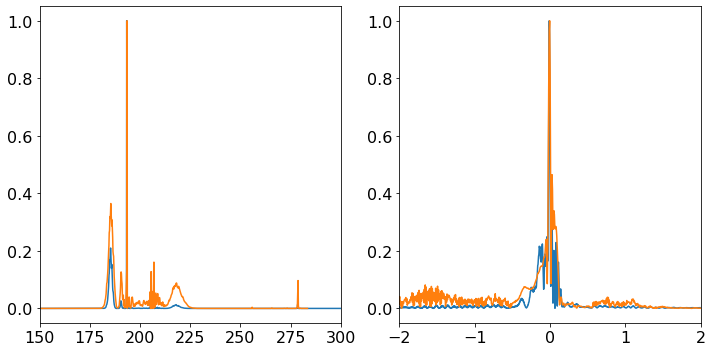

In [19]:
# it checks out
pulse_temp = get_data('temp')
pulse_spec = get_data('spec')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(pulse_temp.F_THz, normalize(abs(pulse_temp.AW) ** 2))
ax1.plot(300 / data_spec[:, 2], normalize(data_spec[:, 0]))
ax2.plot(pulse_spec.T_ps, normalize(abs(pulse_spec.AT) ** 2))
ax2.plot(data_temp[:, 2] / 1000, data_temp[:, 0])
ax1.set_xlim(150, 300)
ax2.set_xlim(-2, 2)

Pulse energy before None : 1.4000000000000001 nJ
pulse energy in  111799.99036437145
copied as   111799.99036437145
Step: 1 Distance remaining: 0.00099
Pulse energy after: 1.393724636387462 nJ
Step: 2 Distance remaining: 0.00098
Pulse energy after: 1.394416734632664 nJ
Step: 3 Distance remaining: 0.0009699999999999999
Pulse energy after: 1.3939435176122779 nJ
Step: 4 Distance remaining: 0.00096
Pulse energy after: 1.3936157030841798 nJ
Step: 5 Distance remaining: 0.00095
Pulse energy after: 1.3944185763488601 nJ
Step: 6 Distance remaining: 0.00094
Pulse energy after: 1.3939468340184986 nJ
Step: 7 Distance remaining: 0.0009299999999999999
Pulse energy after: 1.393278666035749 nJ
Step: 8 Distance remaining: 0.00092
Pulse energy after: 1.3942179497383291 nJ
Step: 9 Distance remaining: 0.00091
Pulse energy after: 1.3930363012499014 nJ
Step: 10 Distance remaining: 0.0009000000000000001
Pulse energy after: 1.3930711768984263 nJ
Step: 11 Distance remaining: 0.0008900000000000001
Pulse energy 

Pulse energy after: 1.3957096000203564 nJ
Step: 96 Distance remaining: 4.000000000000004e-05
Pulse energy after: 1.3955458863838976 nJ
Step: 97 Distance remaining: 3.0000000000000028e-05
Pulse energy after: 1.3954473774965659 nJ
Step: 98 Distance remaining: 2.000000000000002e-05
Pulse energy after: 1.39595126224431 nJ
Step: 99 Distance remaining: 1.000000000000001e-05
Pulse energy after: 1.3958113466732878 nJ
Pulse energy after None : 1.399981993087726 nJ
Pulse energy before None : 1.4000000000000001 nJ
pulse energy in  111799.99036437145
copied as   111799.99036437145
Step: 1 Distance remaining: 0.00099
Pulse energy after: 1.393724636387462 nJ
Step: 2 Distance remaining: 0.00098
Pulse energy after: 1.394416734632664 nJ
Step: 3 Distance remaining: 0.0009699999999999999
Pulse energy after: 1.3939435176122779 nJ
Step: 4 Distance remaining: 0.00096
Pulse energy after: 1.3936157030841798 nJ
Step: 5 Distance remaining: 0.00095
Pulse energy after: 1.3944185763488601 nJ
Step: 6 Distance remai

Pulse energy after: 1.395923209099613 nJ
Step: 91 Distance remaining: 8.999999999999997e-05
Pulse energy after: 1.3959184529599882 nJ
Step: 92 Distance remaining: 7.999999999999997e-05
Pulse energy after: 1.3955513762279483 nJ
Step: 93 Distance remaining: 6.999999999999995e-05
Pulse energy after: 1.3959060301744597 nJ
Step: 94 Distance remaining: 6.0000000000000056e-05
Pulse energy after: 1.3957716844775006 nJ
Step: 95 Distance remaining: 5.000000000000004e-05
Pulse energy after: 1.3955131461041759 nJ
Step: 96 Distance remaining: 4.000000000000004e-05
Pulse energy after: 1.3961648264528628 nJ
Step: 97 Distance remaining: 3.0000000000000028e-05
Pulse energy after: 1.3963459379886558 nJ
Step: 98 Distance remaining: 2.000000000000002e-05
Pulse energy after: 1.3954584007697648 nJ
Step: 99 Distance remaining: 1.000000000000001e-05
Pulse energy after: 1.3955740365608273 nJ
Pulse energy after None : 1.3999792913918108 nJ
Pulse energy before None : 1.4000000000000001 nJ
pulse energy in  111799

Pulse energy after: 1.3953619431118764 nJ
Step: 85 Distance remaining: 0.00015000000000000001
Pulse energy after: 1.3948689352682855 nJ
Step: 86 Distance remaining: 0.00014000000000000001
Pulse energy after: 1.3951656028226653 nJ
Step: 87 Distance remaining: 0.00013000000000000002
Pulse energy after: 1.3961251271394393 nJ
Step: 88 Distance remaining: 0.00012
Pulse energy after: 1.3958156512004265 nJ
Step: 89 Distance remaining: 0.00010999999999999999
Pulse energy after: 1.395253130861959 nJ
Step: 90 Distance remaining: 9.999999999999998e-05
Pulse energy after: 1.3952256028752639 nJ
Step: 91 Distance remaining: 8.999999999999997e-05
Pulse energy after: 1.3951777672639827 nJ
Step: 92 Distance remaining: 7.999999999999997e-05
Pulse energy after: 1.395774540833067 nJ
Step: 93 Distance remaining: 6.999999999999995e-05
Pulse energy after: 1.3960782626429598 nJ
Step: 94 Distance remaining: 6.0000000000000056e-05
Pulse energy after: 1.3958686207748554 nJ
Step: 95 Distance remaining: 5.00000000

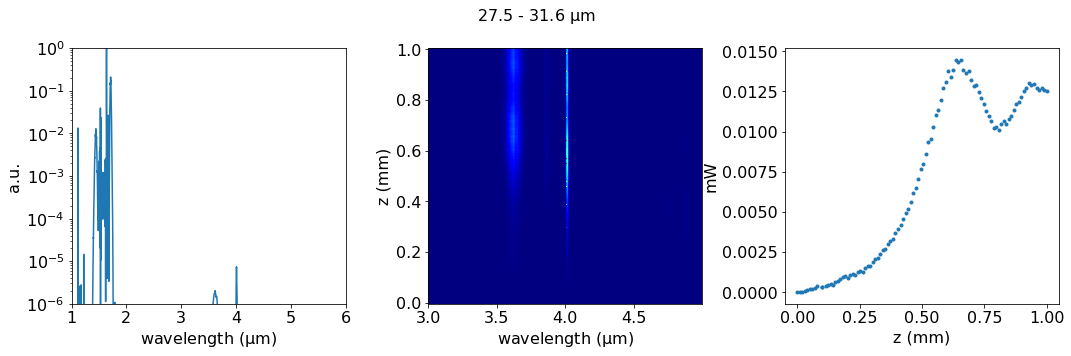

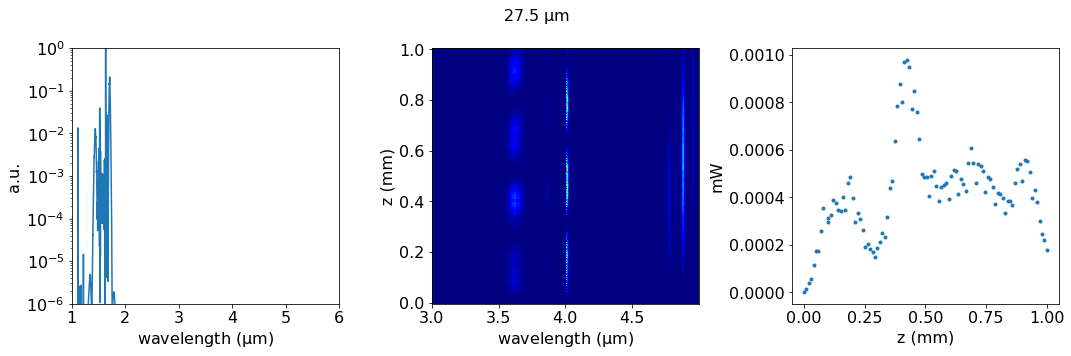

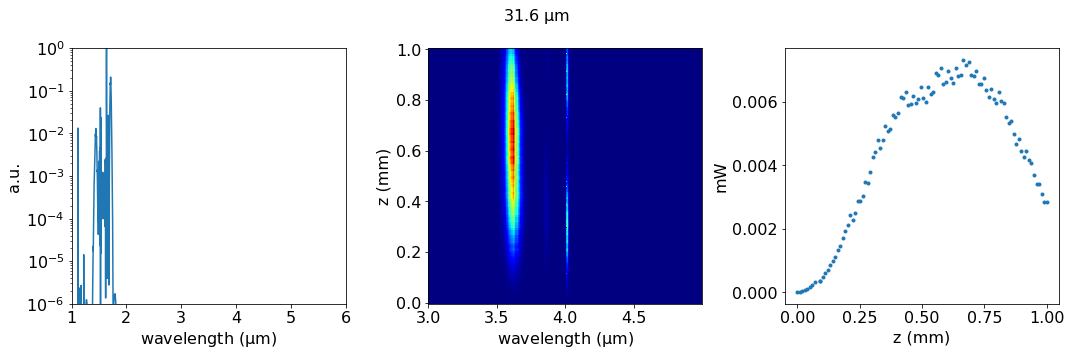

In [20]:
pulse = get_data('spec')


def sim_poling_period(poling_period, plotting=True, title=None):
    ppln = fpn.PPLN()
    ppln.generate_ppln(pulse, .001, 1550, poling_period)

    ssfm = fpn.PPLNThreeWaveMixing()
    sim_ppln = ssfm.propagate(pulse, ppln, 100)

    evol = Evol(sim_ppln)
    if plotting:
        plot(evol, title)
    return sim_ppln, evol


def plot(evol, title=None):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    evol.plot_1dwindow(ax1)
    evol.plot_2dwindow(3, 5, ax2)
    evol.plot_power_in_window(3, 5, ax3)
    if title is not None:
        fig.suptitle(title)


sim_appln, evol_appln = sim_poling_period(appln_poling_period(27.5, 31.6), plotting=True,
                                          title='27.5 - 31.6 $\mathrm{\mu m}$')
sim_27_5, evol_27_5 = sim_poling_period(constant_poling_period(27.5), plotting=True,
                                        title='27.5 $\mathrm{\mu m}$')
sim_31_6, evol_31_6 = sim_poling_period(constant_poling_period(31.6), plotting=True,
                                        title='31.6 $\mathrm{\mu m}$')


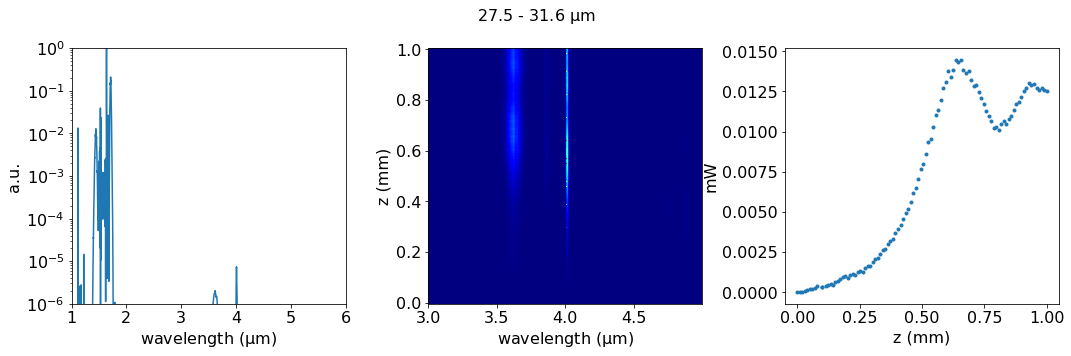

In [21]:
plot(evol_appln, title='27.5 - 31.6 $\mathrm{\mu m}$')

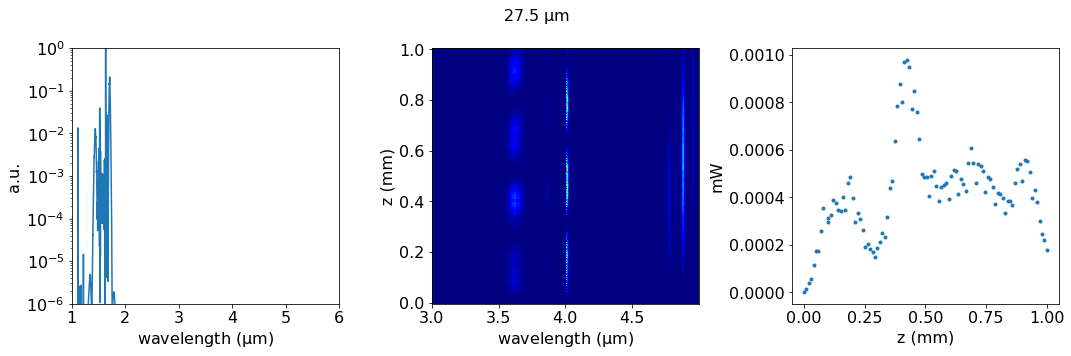

In [22]:
plot(evol_27_5, title='27.5 $\mathrm{\mu m}$')

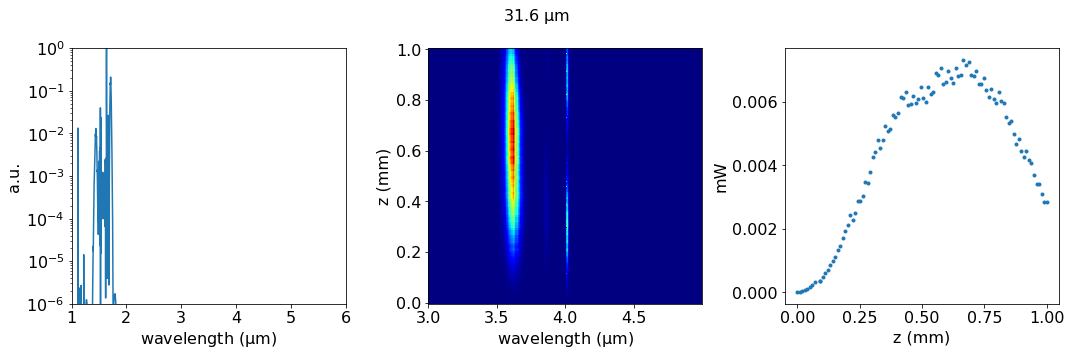

In [23]:
plot(evol_31_6, title='31.6 $\mathrm{\mu m}$')